In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

In [2]:
# Load the MNIST dataset (you may need to install it using pip install scikit-learn)
mnist = fetch_openml("mnist_784")

<Figure size 640x480 with 0 Axes>

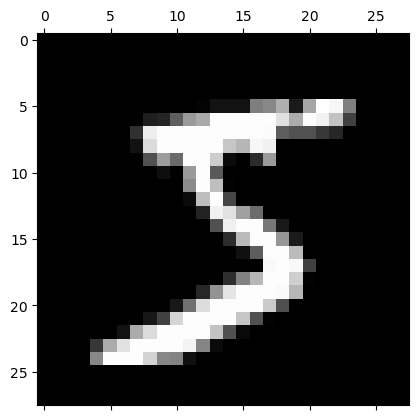

In [3]:

# Display a sample image
plt.gray()
plt.matshow(mnist.data.to_numpy()[0].reshape(28, 28))  # Convert to NumPy array
plt.show()

In [4]:
# Define variables
n_samples = len(mnist.data)
print(n_samples)

70000


In [5]:
x = mnist.data.astype('float32') / 255.0  # Normalize pixel values to be between 0 and 1
y = mnist.target.astype('int')


In [6]:
# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Create and train the linear SVM model
model_linear = svm.SVC(kernel='linear', C=1)
model_linear.fit(X_train, Y_train)


SVC(C=1, kernel='linear')

In [11]:
import joblib
joblib.dump(model_linear, 'linear_svm_model.joblib')


['linear_svm_model.joblib']

In [8]:
# Predict and evaluate
y_pred_linear = model_linear.predict(X_test)
accuracy_linear = model_linear.score(X_test, Y_test)


In [9]:

print("Accuracy with linear kernel:", accuracy_linear)
print(classification_report(Y_test, y_pred_linear))

Accuracy with linear kernel: 0.9351428571428572
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.96      0.98      0.97      1600
           2       0.91      0.92      0.92      1380
           3       0.91      0.92      0.92      1433
           4       0.93      0.94      0.94      1295
           5       0.90      0.90      0.90      1273
           6       0.97      0.95      0.96      1396
           7       0.95      0.95      0.95      1503
           8       0.92      0.88      0.90      1357
           9       0.93      0.91      0.92      1420

    accuracy                           0.94     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.94      0.94      0.94     14000



In [12]:
# Load the saved model


new_data  = 
# Use the loaded model for predictions
new_predictions = loaded_model.predict(new_data)

NameError: name 'new_data' is not defined

C:\Users\hicham\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


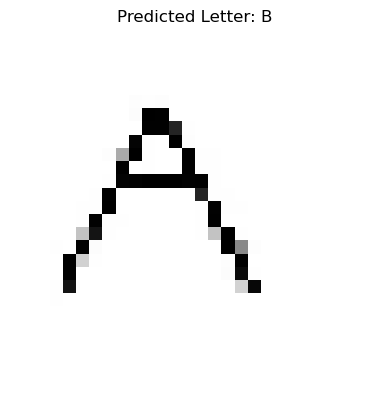

In [5]:
import cv2
import joblib
import matplotlib.pyplot as plt

# Path to the new image
new_data_path = r"C:\Users\hicham\Desktop\Ai project\H.jpg"

# Read and resize the image
new_image = cv2.imread(new_data_path, cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(new_image, (28, 28))

# Flatten the image
flattened_image = resized_image.flatten().reshape(1, -1)

# Load the saved model
loaded_model = joblib.load('linear_svm_model.joblib')

# Use the loaded model for prediction
prediction = loaded_model.predict(flattened_image)

# Map the predicted numerical class back to the letter (assuming classes are 1 to 26)
predicted_letter = chr(ord('A') + prediction[0] - 1)

# Display the image and the predicted letter
plt.imshow(resized_image, cmap='gray')
plt.title(f"Predicted Letter: {predicted_letter}")
plt.axis("off")
plt.show()
